# Simple examples without neural networks

In PyTorch keeps track of all operations to be able to compute gradients 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Example 1 -- Computing gradients

In [2]:
x1 = torch.tensor(2, requires_grad=True, dtype=torch.float32)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float32)
x3 = torch.tensor(1, requires_grad=True, dtype=torch.float32)
x4 = torch.tensor(4, requires_grad=True, dtype=torch.float32)

# Forward propagation
z1 = x1 * x2
z2 = x3 * x4
f = z1 + z2
f.backward() # Compute gradients

print(f"f's derivative w.r.t. x1 is {x1.grad}")


f's derivative w.r.t. x1 is 3.0


## Disable gradient computations with `no_grad()`
Disabling gradient calculation is useful for inference, when you are sure that you will not call `Tensor.backward()`. It will reduce memory consumption for computations that would otherwise have `requires_grad=True`.

Tricky, but very carateristic bug: https://pytorch.org/docs/stable/generated/torch.no_grad.html

In [3]:
x = torch.tensor([1.0], requires_grad=True) # Crucial use floats for this
with torch.no_grad():
    y = x * 2
print(y.requires_grad)
print(x.requires_grad)

# To detach x from the computational graph, use the `.detach()` funciton
x = x.detach()
print(x.requires_grad)



False
True
False


## Example 2 -- Training a simple model
### Generate data
We generate data based on the very simple model 
$$ y = ax + b + \epsilon, \quad\quad x\sim \mathcal{N}(0,2^2)\text{ and }\epsilon \sim \mathcal{N}(0,0.6^2)$$
where $a=-1.5$ and $b=8.5$.

In [4]:
N = 100      # number of training data
a_ref = -1.5 # We want to learn this parameter
b_ref = 8.5  # We want to learn this parameter

x = 2*torch.randn(N, dtype=torch.float)
noise = 0.6*torch.randn(N, dtype=torch.float)
y = a_ref*x + b_ref + noise

# We are given data y and x

### Create loss function ($l^2$-loss function)
We use the mean squared error loss function. That is 
$$\frac{1}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)})^2. $$

In [5]:
def MSE_loss(prediction, target): # Mean squared error (MSE)
    return (prediction-target).pow(2).mean()

### Use gradient descent to find values for $a$ and $b$ using the data $x$ and $y$

Recall the gradient descent step
$$\theta^{(i+1)} = \theta^{(i)} - \alpha_i \nabla \Gamma(\theta^{(i)}),$$
where $\alpha_i > 0$ is the learning rate (also called step length).


In [6]:
a = torch.tensor(0, dtype=torch.float, requires_grad=True)
b = torch.tensor(0, dtype=torch.float, requires_grad=True)

number_of_epochs = 1000
learning_rate = 0.01
for iter in range(number_of_epochs):
    y_pred = a*x+b
    loss = MSE_loss(y_pred,y)
    loss.backward() # Compute gradients
    # Update weights, without tracking the computations
    with torch.no_grad():
        a = a - learning_rate*a.grad
        b = b - learning_rate*b.grad
    # In the update step above, these have been set to False
    a.requires_grad = True
    b.requires_grad = True
    
print(a)
print(b)

tensor(-1.5090, requires_grad=True)
tensor(8.5602, requires_grad=True)


### Plot the solution

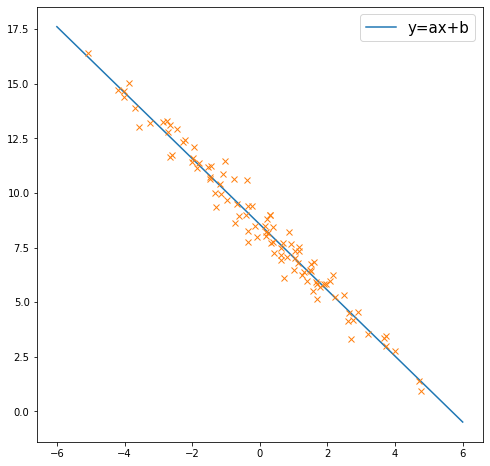

In [7]:
x_equi = torch.linspace(-6,6,101)
y_pred = a*x_equi + b

plt.figure(figsize=(8,8))
plt.plot(x_equi.detach().numpy(), y_pred.detach().numpy(), label='y=ax+b')
plt.plot(x,y, 'x')
plt.legend(fontsize=15)
plt.show()
